# 1. Import data

In [632]:
import seaborn as sns
import pandas as pd
import pysal as ps
import numpy as np
from pandas import read_csv
import sklearn

In [633]:
HW=pd.read_excel(r'Data/MDA.xlsx')
GDP=pd.read_excel(r'Data/GDP.xlsx')
HE=pd.read_excel(r'Data/health expenditure.xls')
FAO=pd.read_csv(r'Data/FAOSTAT.csv')
Popu=pd.read_csv(r'Data/population.csv')

# 2.Merge data

## 2.1 Merge the data of heatweave and GDP as merge1

In [634]:
HW.head()

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,...,No Homeless,Total Affected,CPI,Location,Code,country,latitude,longitude,name,num
0,0,1993-0515-AUS,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,...,NaN,3000500.0,53.311620,South-east Australia,AU,AU,-25.274398,133.775136,Australia,0
1,1,1990-0356-MEX,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,...,NaN,NaN,48.218797,North,ME,ME,42.708678,19.374390,Montenegro,1
2,2,1990-0085-FRA,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,NaN,NaN,48.218797,Southwestern,FR,FR,46.227638,2.213749,France,2
3,3,1991-0279-PAK,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,...,NaN,250.0,50.260853,"Jacobabab, Nawabsma, Hyderabad (Sind province)",PA,PA,8.537981,-80.782127,Panama,3
4,4,1990-0373-USA,1990,Heat wave,United States of America (the),USA,Northern America,Americas,NaN,NaN,...,NaN,NaN,48.218797,"Californie, Arizona, Colorado",US,US,37.090240,-95.712891,United States,4


In [635]:
HW = HW.drop(columns=["Unnamed: 0","Dis No","name","num"])

In [636]:
GDP.head()

,Country,Scale,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Afghanistan, Islamic Rep. of",Millions,...,...,...,...,...,...,...,...,...,1033590,1116830,1183040,1226570,1222920,1285460,1327690,1469600,1547290,...
1,Albania,Millions,...,...,...,...,...,...,334359,331324,...,1.33281e+06,1.35005e+06,1.3953e+06,1.43431e+06,1.47248e+06,1.55065e+06,1.63673e+06,1.6919e+06,1.64408e+06,...
2,Algeria,Millions,554400,862132,1074695,1189724,1487400,2004990,2570000,2780200,...,16209600,16647900,17228600,16712686,1.75146e+07,1.88762e+07,2.03935e+07,2.05011e+07,1.83838e+07,...
3,"Andorra, Principality of",Millions,...,...,...,...,...,...,...,...,...,2481.85,2404.54,2462.69,2514.51,2616.86,2655.76,2725.27,2818.81,2507.69,...
4,Angola,Millions,...,...,...,...,...,...,...,...,...,1.22249e+07,1.3195e+07,14323859,1.39503e+07,16549600,20262300,2.56277e+07,3.08335e+07,3.37565e+07,...


In [637]:
GDP=GDP[['Country', 'Scale',1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,
         2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]]
GDP=GDP.rename(columns={'Scale':'GDP_Scale'})
GDP=pd.melt(GDP, id_vars=['Country', 'GDP_Scale'], value_vars=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,
         2012,2013,2014,2015,2016,2017,2018,2019,2020,2021], var_name='Year',value_name='GDP_value', col_level=None)


In [638]:
GDP['Year']=GDP['Year'].astype(int)
merge1 = pd.merge(HW, GDP, on=['Year', 'Country'])

In [639]:
merge1.head()

,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,No Homeless,Total Affected,CPI,Location,Code,country,latitude,longitude,GDP_Scale,GDP_value
0,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,NaN,3000500.0,53.311620,South-east Australia,AU,AU,-25.274398,133.775136,Millions,454964
1,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,No,No,...,NaN,NaN,48.218797,North,ME,ME,42.708678,19.374390,Millions,...
2,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,NaN,NaN,48.218797,Southwestern,FR,FR,46.227638,2.213749,Millions,1053546
3,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,No,No,...,NaN,250.0,50.260853,"Jacobabab, Nawabsma, Hyderabad (Sind province)",PA,PA,8.537981,-80.782127,Millions,...
4,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,NaN,100150.0,54.701693,Townsville,AU,AU,-25.274398,133.775136,Millions,482370


## 2.2 Merge the data of health expenditure and merge1 as merge2

In [640]:
HE.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,113.183637,111.227695,104.541257,99.008506,94.739159,102.410661,96.289480,91.970113,NaN,NaN
2,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,69.998604,65.806030,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,71.039947,78.746863,81.804505,73.297775,63.649069,60.968846,59.328810,61.338476,NaN,NaN
4,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.310738,71.326004,NaN,NaN


In [641]:
HE=HE[['Country Name','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020']]
HE=HE.rename(columns={'Country Name':'Country'})
HE=pd.melt(HE, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'], 
           var_name='Year', value_name='HE_value', col_level=None)


In [642]:
HE['Year']=HE['Year'].astype(int)
merge2 = pd.merge(merge1, HE, on=['Year', 'Country'])

In [643]:
merge2.head()

,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,Total Affected,CPI,Location,Code,country,latitude,longitude,GDP_Scale,GDP_value,HE_value
0,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,3000500.0,53.311620,South-east Australia,AU,AU,-25.274398,133.775136,Millions,454964,NaN
1,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,No,No,...,NaN,48.218797,North,ME,ME,42.708678,19.374390,Millions,...,NaN
2,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,NaN,48.218797,Southwestern,FR,FR,46.227638,2.213749,Millions,1053546,NaN
3,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,No,No,...,250.0,50.260853,"Jacobabab, Nawabsma, Hyderabad (Sind province)",PA,PA,8.537981,-80.782127,Millions,...,NaN
4,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,100150.0,54.701693,Townsville,AU,AU,-25.274398,133.775136,Millions,482370,NaN


## 2.2 Merge the data of health expenditure and merge2 as merge3

In [644]:
FAO.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,1717,"Cereals, Total",1990,1990,hg/ha,12006,Fc,Calculated data
1,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,1717,"Cereals, Total",1991,1991,hg/ha,11604,Fc,Calculated data
2,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,1717,"Cereals, Total",1992,1992,hg/ha,10978,Fc,Calculated data
3,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,1717,"Cereals, Total",1993,1993,hg/ha,11329,Fc,Calculated data
4,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,1717,"Cereals, Total",1994,1994,hg/ha,11404,Fc,Calculated data


In [645]:
FAO=FAO.rename(columns={'Area':'Country','Value':'FAO_Value'})
FAO=FAO.set_index(["Country", "Year","Item"])["FAO_Value"].unstack().rename_axis(columns=None).reset_index()
FAO=FAO.rename(columns={'Cereals, Total':'Cereals','Fruit Primary':'Fruit','Milk, Total':'Milk','Vegetables Primary':'Vegetables'})
merge3 = pd.merge(merge2, FAO, on=['Year', 'Country'])

In [646]:
merge3.head()

,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,country,latitude,longitude,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables
0,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,AU,-25.274398,133.775136,Millions,454964,NaN,19795.0,159430.0,44514.0,194803.0
1,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,No,No,...,ME,42.708678,19.374390,Millions,...,NaN,24244.0,124366.0,24592.0,136650.0
2,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,FR,46.227638,2.213749,Millions,1053546,NaN,60826.0,109337.0,35309.0,162003.0
3,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,No,No,...,PA,8.537981,-80.782127,Millions,...,NaN,18058.0,92473.0,9215.0,123481.0
4,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,AU,-25.274398,133.775136,Millions,482370,NaN,12667.0,158592.0,46612.0,209118.0


In [647]:
## 2.2 Merge the data of population and merge3 as Merge

In [648]:
Popu.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 32,Unnamed: 33
0,Burundi,5439.0,5565.0,5686.0,5798.0,5899.0,5987.0,6060.0,6122.0,6186.0,...,9540.0,9844.0,10160.0,10488.0,10827.0,11175.0,11531.0,11891.0,NaN,NaN
1,Comoros,412.0,424.0,436.0,449.0,462.0,475.0,489.0,502.0,515.0,...,742.0,759.0,777.0,796.0,814.0,832.0,851.0,870.0,NaN,NaN
2,Djibouti,590.0,425.0,615.0,619.0,622.0,630.0,644.0,661.0,680.0,...,883.0,899.0,914.0,929.0,944.0,959.0,974.0,988.0,NaN,NaN
3,Eritrea,2259.0,426.0,2258.0,2239.0,2218.0,2204.0,2196.0,2195.0,2206.0,...,3281.0,3311.0,3343.0,3377.0,3413.0,3453.0,3497.0,3546.0,NaN,NaN
4,Ethiopia,47888.0,427.0,51424.0,53296.0,55181.0,57048.0,58884.0,60697.0,62508.0,...,95386.0,98094.0,100835.0,103603.0,106400.0,109224.0,112079.0,114964.0,NaN,NaN


In [649]:
Popu=pd.melt(Popu, id_vars=['Country'], value_vars=['1990 ', '1991 ', '1992 ', '1993 ', '1994 ', '1995 ','1996 ', '1997 ', '1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ',
       '2004 ', '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ','2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ','2020 '], var_name='Year', value_name='Population_value', col_level=None)

In [650]:
Popu['Year']=Popu['Year'].astype(int)
Merge = pd.merge(merge3, Popu, on=['Year', 'Country'])

In [651]:
Merge

,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,Appeal,Declaration,...,latitude,longitude,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value
0,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,-25.274398,133.775136,Millions,454964,NaN,19795.0,159430.0,44514.0,194803.0,17603.0
1,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,No,No,...,42.708678,19.374390,Millions,...,NaN,24244.0,124366.0,24592.0,136650.0,83943.0
2,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,46.227638,2.213749,Millions,1053546,NaN,60826.0,109337.0,35309.0,162003.0,56667.0
3,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,No,No,...,8.537981,-80.782127,Millions,...,NaN,18058.0,92473.0,9215.0,123481.0,511.0
4,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,NaN,NaN,...,-25.274398,133.775136,Millions,482370,NaN,12667.0,158592.0,46612.0,209118.0,17799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,NaN,NaN,...,20.593684,78.962880,Millions,197358000,63.748322,34049.0,146866.0,13608.0,152808.0,1366418.0
97,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,NaN,NaN,...,40.463667,-3.749220,Millions,1244375,2711.192871,34455.0,117714.0,16957.0,409289.0,46737.0
98,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,46.227638,2.213749,Millions,2437635,4491.735352,74919.0,96076.0,41928.0,222027.0,65130.0
99,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,NaN,NaN,...,46.227638,2.213749,Millions,2437635,4491.735352,74919.0,96076.0,41928.0,222027.0,65130.0


In [652]:
import csv 
import pandas as pd 
Merge.to_csv('Merge.csv') 

# 3. Visualization

In [653]:
import os
import altair as alt 
from altair_saver import save 
from pyecharts import options as opts     # pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pyecharts
from pyecharts.charts import  Timeline,Map
import geopandas
import matplotlib.pyplot as plt
import matplotlib.pyplot as pet
from geopandas import GeoDataFrame
import geopandas
import seaborn as sns
import folium
import webbrowser
from folium.plugins import HeatMap

## 3.1 Chart 1:bar

In [654]:
cou=Merge['ISO']
fre=cou.value_counts()
fre2=fre.sort_index()
fre3={'country':fre2.index,'frequency':fre2.values}
chart1=pd.DataFrame(fre3)

<AxesSubplot:title={'center':'heat wave frequency for each country'}, xlabel='country', ylabel='frequency'>

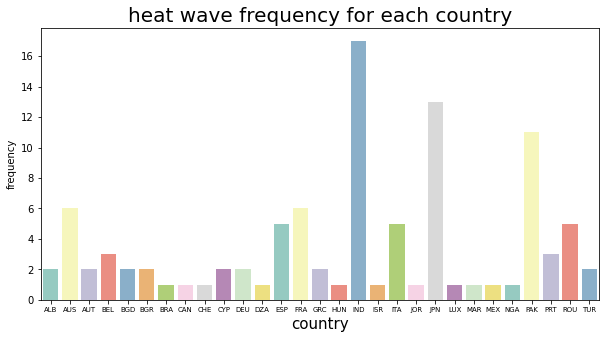

In [655]:
#barplot
ax = plt.figure(figsize=(10, 5)).add_subplot(111)
ax.set_xlabel('country', fontsize=15)
ax.set_title('heat wave frequency for each country', size=20)
plt.xticks(fontsize=7)
plt.yticks(fontsize=10)
sns.barplot(x="country",y="frequency",data=chart1,palette="Set3")

## 3.1 Chart 2: Map

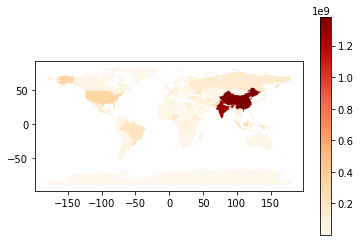

In [656]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1)
world.plot(column= 'pop_est',cmap='OrRd', ax=ax, legend=True)
plt.show()

In [657]:
chart2=Merge
chart2=chart2[['latitude','longitude','Total Deaths']]
chart2=chart2.dropna()

In [658]:
LAT_chart2 = chart2['latitude']  #纬度
LNG_chart2 = chart2['longitude']  #经度
 
#list
data1 = [[chart2['latitude'][i],chart2['longitude'][i],
          chart2['Total Deaths'][i]] for i in chart2.index]
 
Center=[LAT_chart2.mean(),LNG_chart2.mean()]

#map
m=folium.Map(location=Center,zoom_start=6)
#heatmap
HeatMap(data1,radius = 15).add_to(m)
m


In [659]:
data = chart2
Deaths = folium.map.FeatureGroup()
for lat, lng, in zip(data.latitude, data.longitude):
    Deaths.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=12, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
Center=[LAT_Merge.mean(),LNG_Merge.mean()]

world_map = folium.Map(location=Center, zoom_start=12)
world_map.add_child(Deaths)

<AxesSubplot:>

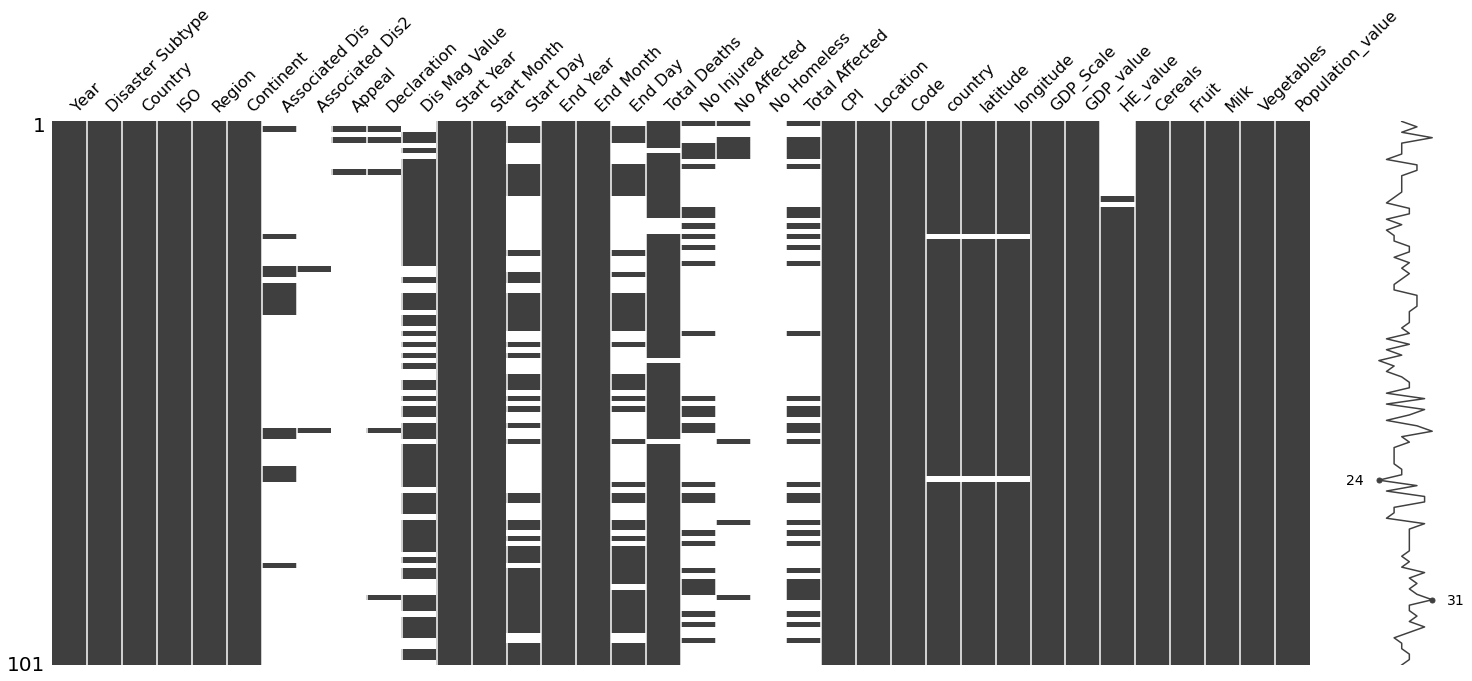

In [660]:
import missingno as msno
# Visualize missing values as a matrix
chart3=Merge
msno.matrix(chart3)

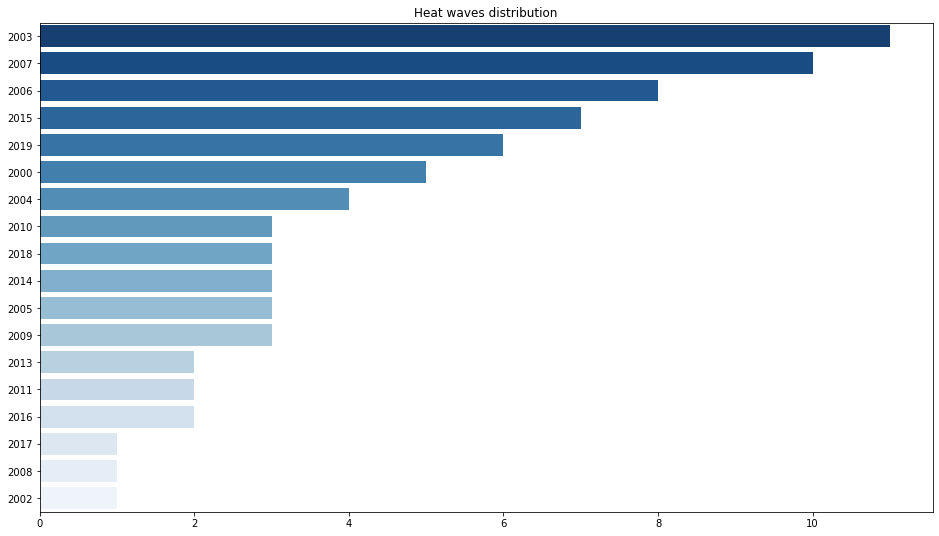

In [661]:
# Heat waves distribution per year
Year_counts = df.Year.value_counts().sort_values(ascending=False)

fig= plt.subplots(figsize = (16, 9))
sns.barplot(x = Year_counts.values, y = Year_counts.index, orient = "h", order = Year_counts.index, palette = "Blues_r")
plt.title("Heat waves distribution")
plt.show()

# 4 Data Analysis

In [594]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
import math

In [662]:
df=read_csv("Data/Merge.csv")
df

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,...,name,num,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value
0,0,1993-0515-AUS,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,...,Australia,0,Millions,454964,NaN,19795,159430,44514,194803,17603
1,1,1990-0356-MEX,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,...,Montenegro,1,Millions,...,NaN,24244,124366,24592,136650,83943
2,2,1990-0085-FRA,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,France,2,Millions,1053546,NaN,60826,109337,35309,162003,56667
3,3,1991-0279-PAK,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,...,Panama,3,Millions,...,NaN,18058,92473,9215,123481,511
4,4,1994-0641-AUS,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,...,Australia,6,Millions,482370,NaN,12667,158592,46612,209118,17799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,...,India,141,Millions,197358000,63.748322,34049,146866,13608,152808,1366418
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,...,Spain,143,Millions,1244375,2711.192871,34455,117714,16957,409289,46737
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,France,144,Millions,2437635,4491.735352,74919,96076,41928,222027,65130
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,France,145,Millions,2437635,4491.735352,74919,96076,41928,222027,65130


In [663]:
from datetime import datetime

# deal with lasting month/year
Syear = df["Start Year"]
Smonth = df["Start Month"]
Sday = df["Start Day"]
Eyear = df["End Year"]
Emonth = df["End Month"]
Eday = df["End Day"]

Sday = Sday.fillna(1).astype("int64")
Eday = Eday.fillna(1).astype("int64")

lstingdays = list()

for i in range(len(Syear)):
    time1 = datetime(Syear[i],Smonth[i],Sday[i])
    time2 = datetime(Eyear[i],Emonth[i],Eday[i])
    lstingday = (time2 - time1).days + 1
    lstingdays.append(lstingday)
    
df["Lasting Days"] = pd.Series(lstingdays, name="Lasting Days")
df = df.drop(columns = ['Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day'])
df

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,...,num,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days
0,0,1993-0515-AUS,1993,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,...,0,Millions,454964,NaN,19795,159430,44514,194803,17603,1
1,1,1990-0356-MEX,1990,Heat wave,Mexico,MEX,Central America,Americas,Drought,NaN,...,1,Millions,...,NaN,24244,124366,24592,136650,83943,38
2,2,1990-0085-FRA,1990,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,2,Millions,1053546,NaN,60826,109337,35309,162003,56667,1
3,3,1991-0279-PAK,1991,Heat wave,Pakistan,PAK,Southern Asia,Asia,NaN,NaN,...,3,Millions,...,NaN,18058,92473,9215,123481,511,15
4,4,1994-0641-AUS,1994,Heat wave,Australia,AUS,Australia and New Zealand,Oceania,NaN,NaN,...,6,Millions,482370,NaN,12667,158592,46612,209118,17799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,...,141,Millions,197358000,63.748322,34049,146866,13608,152808,1366418,1
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,...,143,Millions,1244375,2711.192871,34455,117714,16957,409289,46737,5
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,144,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,14
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,145,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,7


In [664]:
# processing health expense value
df = df.dropna(subset=["HE_value"])
# processing GDP value
df["GDP_value"][df["GDP_value"] == "..."] = np.nan
df = df.dropna(subset=["GDP_value"])
df

<ipython-input-664-c5ab75986215>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GDP_value"][df["GDP_value"] == "..."] = np.nan
/Users/zhangquandi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Associated Dis,Associated Dis2,...,num,GDP_Scale,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days
14,14,2000-0382-BGR,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,NaN,NaN,...,22,Millions,28124.88,94.497452,24599,46568,5341,93981,7998,31
16,16,2000-0398-CYP,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,NaN,NaN,...,24,Millions,10594.981,750.516724,9314,101052,5460,320357,943,1
17,17,2000-0379-GRC,2000,Heat wave,Greece,GRC,Southern Europe,Europe,NaN,NaN,...,25,Millions,141247.2762,885.410400,38688,164302,1846,298026,11082,1
18,18,2000-0473-ISR,2000,Heat wave,Israel,ISR,Western Asia,Asia,NaN,NaN,...,27,Millions,540061.2,1513.944702,24433,197900,33167,308815,5946,1
19,19,2000-0471-JOR,2000,Heat wave,Jordan,JOR,Western Asia,Asia,NaN,NaN,...,28,Millions,6185.74889,159.147644,17283,121002,1775,299110,5122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,...,141,Millions,197358000,63.748322,34049,146866,13608,152808,1366418,1
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,...,143,Millions,1244375,2711.192871,34455,117714,16957,409289,46737,5
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,144,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,14
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,145,Millions,2437635,4491.735352,74919,96076,41928,222027,65130,7


In [665]:
# processing associated disaster
assdrought = ((df["Associated Dis"] == "Drought")|(df["Associated Dis2"] == "Drought")).astype("int64")
asswildfire = ((df["Associated Dis"] == "Wildfire")|(df["Associated Dis2"] == "Wildfire")).astype("int64")

In [666]:
df["Associated Drought"] = pd.Series(assdrought, name = 'Associated Drought')
df["Associated Wildfire"] = pd.Series(asswildfire, name = 'Associated Wildfire')
df = df.drop(columns=["Associated Dis", "Associated Dis2"])
df

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Appeal,Declaration,...,GDP_value,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire
14,14,2000-0382-BGR,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,NaN,NaN,...,28124.88,94.497452,24599,46568,5341,93981,7998,31,0,0
16,16,2000-0398-CYP,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,NaN,NaN,...,10594.981,750.516724,9314,101052,5460,320357,943,1,0,0
17,17,2000-0379-GRC,2000,Heat wave,Greece,GRC,Southern Europe,Europe,NaN,NaN,...,141247.2762,885.410400,38688,164302,1846,298026,11082,1,0,0
18,18,2000-0473-ISR,2000,Heat wave,Israel,ISR,Western Asia,Asia,NaN,NaN,...,540061.2,1513.944702,24433,197900,33167,308815,5946,1,0,0
19,19,2000-0471-JOR,2000,Heat wave,Jordan,JOR,Western Asia,Asia,NaN,NaN,...,6185.74889,159.147644,17283,121002,1775,299110,5122,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,NaN,...,197358000,63.748322,34049,146866,13608,152808,1366418,1,0,0
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,NaN,...,1244375,2711.192871,34455,117714,16957,409289,46737,5,0,0
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,2437635,4491.735352,74919,96076,41928,222027,65130,14,0,0
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,NaN,NaN,...,2437635,4491.735352,74919,96076,41928,222027,65130,7,0,0


In [667]:
# processing appeal and declaration
appl_dclr = (df["Appeal"] == "Yes")|(df["Declaration"] == "Yes")
df["Appeal or Declaration"] = pd.Series(appl_dclr, name="Appeal or Declaration")
df = df.drop(columns=["Appeal", "Declaration"])
df

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Dis Mag Value,Total Deaths,...,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration
14,14,2000-0382-BGR,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,43.0,7.0,...,94.497452,24599,46568,5341,93981,7998,31,0,0,False
16,16,2000-0398-CYP,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,43.0,5.0,...,750.516724,9314,101052,5460,320357,943,1,0,0,False
17,17,2000-0379-GRC,2000,Heat wave,Greece,GRC,Southern Europe,Europe,44.0,27.0,...,885.410400,38688,164302,1846,298026,11082,1,0,0,False
18,18,2000-0473-ISR,2000,Heat wave,Israel,ISR,Western Asia,Asia,45.0,NaN,...,1513.944702,24433,197900,33167,308815,5946,1,0,0,False
19,19,2000-0471-JOR,2000,Heat wave,Jordan,JOR,Western Asia,Asia,43.0,NaN,...,159.147644,17283,121002,1775,299110,5122,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,22.0,...,63.748322,34049,146866,13608,152808,1366418,1,0,0,False
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,2.0,...,2711.192871,34455,117714,16957,409289,46737,5,0,0,False
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,46.0,567.0,...,4491.735352,74919,96076,41928,222027,65130,14,0,0,False
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,44.0,868.0,...,4491.735352,74919,96076,41928,222027,65130,7,0,0,False


In [668]:
# processing total deaths data
df = df.dropna(subset=["Total Deaths"])
df = df.drop(columns=['No Injured', 'No Affected',
       'No Homeless', 'Total Affected'])
df

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Dis Mag Value,Total Deaths,...,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration
14,14,2000-0382-BGR,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,43.0,7.0,...,94.497452,24599,46568,5341,93981,7998,31,0,0,False
16,16,2000-0398-CYP,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,43.0,5.0,...,750.516724,9314,101052,5460,320357,943,1,0,0,False
17,17,2000-0379-GRC,2000,Heat wave,Greece,GRC,Southern Europe,Europe,44.0,27.0,...,885.410400,38688,164302,1846,298026,11082,1,0,0,False
21,21,2000-0381-TUR,2000,Heat wave,Turkey,TUR,Western Asia,Asia,46.0,11.0,...,199.499374,23706,124770,3908,268129,63240,31,1,0,False
23,23,2000-0380-ROU,2000,Heat wave,Romania,ROU,Eastern Europe,Europe,43.0,6.0,...,69.893456,19278,63618,6192,112997,22137,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,NaN,22.0,...,63.748322,34049,146866,13608,152808,1366418,1,0,0,False
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,NaN,2.0,...,2711.192871,34455,117714,16957,409289,46737,5,0,0,False
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,46.0,567.0,...,4491.735352,74919,96076,41928,222027,65130,14,0,0,False
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,44.0,868.0,...,4491.735352,74919,96076,41928,222027,65130,7,0,0,False


In [669]:
# processing dis mag value
DisMag = df["Dis Mag Value"]
df["Dis Mag Value"] = df["Dis Mag Value"].fillna(round(DisMag.mean(),1))
df

,Unnamed: 0,Dis No,Year,Disaster Subtype,Country,ISO,Region,Continent,Dis Mag Value,Total Deaths,...,HE_value,Cereals,Fruit,Milk,Vegetables,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration
14,14,2000-0382-BGR,2000,Heat wave,Bulgaria,BGR,Eastern Europe,Europe,43.0,7.0,...,94.497452,24599,46568,5341,93981,7998,31,0,0,False
16,16,2000-0398-CYP,2000,Heat wave,Cyprus,CYP,Western Asia,Asia,43.0,5.0,...,750.516724,9314,101052,5460,320357,943,1,0,0,False
17,17,2000-0379-GRC,2000,Heat wave,Greece,GRC,Southern Europe,Europe,44.0,27.0,...,885.410400,38688,164302,1846,298026,11082,1,0,0,False
21,21,2000-0381-TUR,2000,Heat wave,Turkey,TUR,Western Asia,Asia,46.0,11.0,...,199.499374,23706,124770,3908,268129,63240,31,1,0,False
23,23,2000-0380-ROU,2000,Heat wave,Romania,ROU,Eastern Europe,Europe,43.0,6.0,...,69.893456,19278,63618,6192,112997,22137,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2019-0223-IND,2019,Heat wave,India,IND,Southern Asia,Asia,43.5,22.0,...,63.748322,34049,146866,13608,152808,1366418,1,0,0,False
97,97,2019-0296-ESP,2019,Heat wave,Spain,ESP,Southern Europe,Europe,43.5,2.0,...,2711.192871,34455,117714,16957,409289,46737,5,0,0,False
98,98,2019-0296-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,46.0,567.0,...,4491.735352,74919,96076,41928,222027,65130,14,0,0,False
99,99,2019-0366-FRA,2019,Heat wave,France,FRA,Western Europe,Europe,44.0,868.0,...,4491.735352,74919,96076,41928,222027,65130,7,0,0,False


In [670]:
df.columns

Index(['Unnamed: 0', 'Dis No', 'Year', 'Disaster Subtype', 'Country', 'ISO',
       'Region', 'Continent', 'Dis Mag Value', 'Total Deaths', 'CPI',
       'Location', 'Code', 'country', 'latitude', 'longitude', 'name', 'num',
       'GDP_Scale', 'GDP_value', 'HE_value', 'Cereals', 'Fruit', 'Milk',
       'Vegetables', 'Population_value', 'Lasting Days', 'Associated Drought',
       'Associated Wildfire', 'Appeal or Declaration'],
      dtype='object')

In [671]:
# independent variables:
# 'Dis Mag Value', 'CPI', 'latitude', 'longitude','GDP_value', 'HE_value','Population_value',
# 'Lasting Days', 'Associated Drought', 'Associated Wildfire','Appeal or Declaration'

# dependent variables:
# 'Cereals', 'Fruit', 'Milk', 'Vegetables', 'Total Deaths'

indvar = df[[ 'Dis Mag Value', 'CPI', 'latitude', 'longitude','GDP_value', 'HE_value','Population_value',
             'Lasting Days', 'Associated Drought', 'Associated Wildfire','Appeal or Declaration']]

dvar = df[['Cereals', 'Fruit', 'Milk', 'Vegetables', 'Total Deaths']]

allvar = pd.concat([indvar,dvar],axis=1)
allvar

,Dis Mag Value,CPI,latitude,longitude,GDP_value,HE_value,Population_value,Lasting Days,Associated Drought,Associated Wildfire,Appeal or Declaration,Cereals,Fruit,Milk,Vegetables,Total Deaths
14,43.0,63.549547,42.733883,25.485830,28124.88,94.497452,7998,31,0,0,False,24599,46568,5341,93981,7.0
16,43.0,63.549547,35.126413,33.429859,10594.981,750.516724,943,1,0,0,False,9314,101052,5460,320357,5.0
17,44.0,63.549547,39.074208,21.824312,141247.2762,885.410400,11082,1,0,0,False,38688,164302,1846,298026,27.0
21,46.0,63.549547,38.963745,35.243322,171494.21,199.499374,63240,31,1,0,False,23706,124770,3908,268129,11.0
23,43.0,63.549547,45.943161,24.966760,80873.1,69.893456,22137,1,0,0,False,19278,63618,6192,112997,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,43.5,94.349092,20.593684,78.962880,197358000,63.748322,1366418,1,0,0,False,34049,146866,13608,152808,22.0
97,43.5,94.349092,40.463667,-3.749220,1244375,2711.192871,46737,5,0,0,False,34455,117714,16957,409289,2.0
98,46.0,94.349092,46.227638,2.213749,2437635,4491.735352,65130,14,0,0,False,74919,96076,41928,222027,567.0
99,44.0,94.349092,46.227638,2.213749,2437635,4491.735352,65130,7,0,0,False,74919,96076,41928,222027,868.0


In [672]:
# predict total deaths

def rmse_model(model, X, y):
    model.fit(X, y)
    pred_y = model.predict(X)
    # Leave-One-Out-Cross-Validation
    kf = KFold(n_splits= len(df))
    RMSE = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train,y_train)
        pred_y = model.predict(X_test)
        RMSE.append(math.sqrt(mean_squared_error(y_test, pred_y)))
    
    print("Leave-One-Out-Cross-Validation RMSE %f" %(np.mean(RMSE)))
    return np.mean(RMSE)

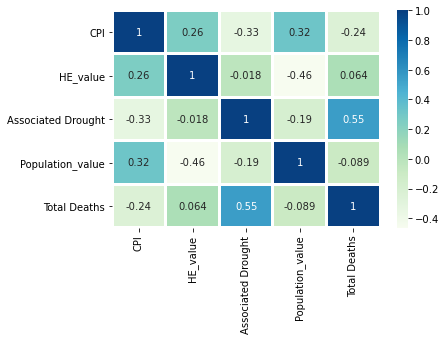

In [673]:
# heatmap of total deaths
cor_deaths = sns.heatmap(pd.concat([indvar[['CPI','GDP_value', 'HE_value', 'Associated Drought',
                         'Population_value']],dvar["Total Deaths"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [674]:
# predict total deaths
# linear model
print("----Linear Regression----")
model1 = LinearRegression()
rmse1 = rmse_model(model1, indvar, dvar["Total Deaths"])

# decision tree
print("\n----Decision Tree-----")
model2 = DecisionTreeRegressor()
rmse2 = rmse_model(model2, indvar, dvar["Total Deaths"])

#SVM
print("\n----Support Vector Machine----")
model3 = SVR()
rmse3 = rmse_model(model3, indvar, dvar["Total Deaths"])

----Linear Regression----
Leave-One-Out-Cross-Validation RMSE 1901.942784

----Decision Tree-----
Leave-One-Out-Cross-Validation RMSE 1279.293333

----Support Vector Machine----
Leave-One-Out-Cross-Validation RMSE 1126.019648


(0.0, 2100.0)

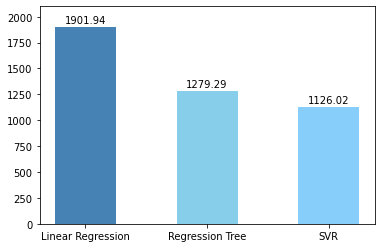

In [675]:
Name = ["Linear Regression","Regression Tree","SVR"]
Rmse = [rmse1,rmse2,rmse3]
plt.bar(Name,Rmse,width=0.5,color=["steelblue","skyblue","lightskyblue"])

for x,y in zip([0,1,2], Rmse):
    plt.text(x,y+20,'%.2f' %y, ha='center',va='bottom')
    
plt.ylim(0,2100)

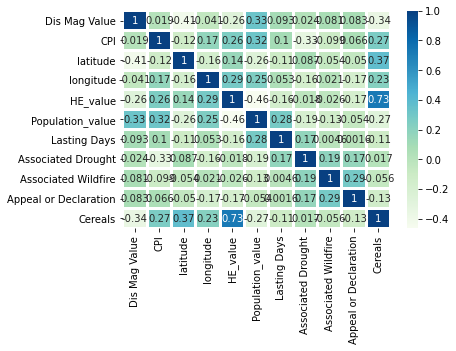

In [676]:
# heatmap of cereals
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Cereals"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [677]:
# predict cereals product
# linear model
print("----Linear Regression----")
model1 = LinearRegression()
rmse1 = rmse_model(model1, indvar, dvar["Cereals"])

# decision tree
print("\n----Decision Tree-----")
model2 = DecisionTreeRegressor()
rmse2 = rmse_model(model2, indvar, dvar["Cereals"])

#SVM
print("\n----Support Vector Machine----")
model3 = SVR()
rmse3 = rmse_model(model3, indvar, dvar["Cereals"])

----Linear Regression----
Leave-One-Out-Cross-Validation RMSE 10158.868759

----Decision Tree-----
Leave-One-Out-Cross-Validation RMSE 7223.466667

----Support Vector Machine----
Leave-One-Out-Cross-Validation RMSE 17254.123672


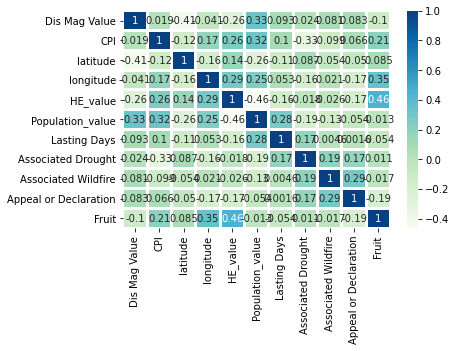

In [678]:
# heatmap of fruit
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Fruit"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [679]:
# predict fruit product
print("----Linear Regression----")
model1 = LinearRegression()
rmse1 = rmse_model(model1, indvar, dvar["Fruit"])

# decision tree
print("\n----Decision Tree-----")
model2 = DecisionTreeRegressor()
rmse2 = rmse_model(model2, indvar, dvar["Fruit"])

#SVM
print("\n----Support Vector Machine----")
model3 = SVR()
rmse3 = rmse_model(model3, indvar, dvar["Fruit"])

----Linear Regression----
Leave-One-Out-Cross-Validation RMSE 35444.862200

----Decision Tree-----
Leave-One-Out-Cross-Validation RMSE 20698.200000

----Support Vector Machine----
Leave-One-Out-Cross-Validation RMSE 41575.543931


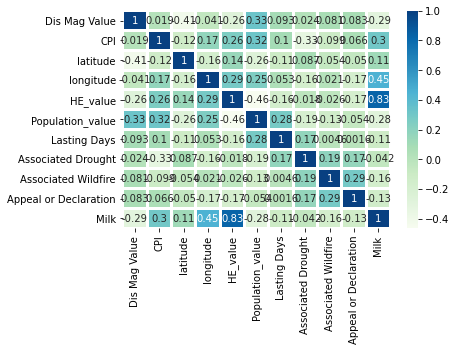

In [680]:
# heatmap of milk
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Milk"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [681]:
# predict milk product
# linear regression
print("----Linear Regression----")
model1 = LinearRegression()
rmse1 = rmse_model(model1, indvar, dvar["Milk"])

# decision tree
print("\n----Decision Tree-----")
model2 = DecisionTreeRegressor()
rmse2 = rmse_model(model2, indvar, dvar["Milk"])

#SVM
print("\n----Support Vector Machine----")
model3 = SVR()
rmse3 = rmse_model(model3, indvar, dvar["Milk"])

----Linear Regression----
Leave-One-Out-Cross-Validation RMSE 8959.888345

----Decision Tree-----
Leave-One-Out-Cross-Validation RMSE 4630.640000

----Support Vector Machine----
Leave-One-Out-Cross-Validation RMSE 24213.717805


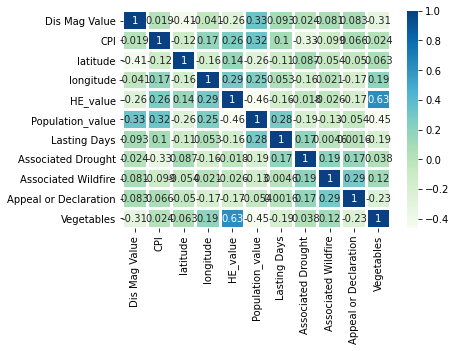

In [682]:
# heatmap of milk
cor_cereals = sns.heatmap(pd.concat([indvar,dvar["Vegetables"]],axis=1).corr(),
                         linewidths=2,cmap='GnBu',annot=True)

In [683]:
# predict vegetables product
# linear regression
print("----Linear Regression----")
model1 = LinearRegression()
rmse1 = rmse_model(model1, indvar, dvar["Vegetables"])

# decision tree
print("\n----Decision Tree-----")
model2 = DecisionTreeRegressor()
rmse2 = rmse_model(model2, indvar, dvar["Vegetables"])

#SVM
print("\n----Support Vector Machine----")
model3 = SVR()
rmse3 = rmse_model(model3, indvar, dvar["Vegetables"])

----Linear Regression----
Leave-One-Out-Cross-Validation RMSE 55412.546713

----Decision Tree-----
Leave-One-Out-Cross-Validation RMSE 22242.373333

----Support Vector Machine----
Leave-One-Out-Cross-Validation RMSE 72838.773206
